# Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Base de dados

In [2]:
# Lendo o Dataset
base = pd.read_csv('data/Startups+in+2021+end.csv')

In [3]:
# Quantidade de observações e variáveis
print(f'Números de linhas: {base.shape[0]}\nNúmero de colunas: {base.shape[1]}')

Números de linhas: 936
Número de colunas: 8


In [4]:
# Primeiros registros
base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
# Colunas
base.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [6]:
# Renomenado e padronizando as colunas
columns_name = {'Unnamed: 0' : 'id',
           'Company' : 'company_name',
           'Valuation ($B)' : 'value_billion',
           'Date Joined' : 'date_joined',
           'Country' : 'country',
           'City' : 'city',
           'Industry' : 'industry',
           'Select Investors' : 'investors'}

base.rename(columns=columns_name, inplace = True)
base.head()

,id,company_name,value_billion,date_joined,country,city,industry,investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


# Análise Exploratória dos Dados

In [7]:
# Verificando o formato de cada variável
base.dtypes

id                int64
company_name     object
value_billion    object
date_joined      object
country          object
city             object
industry         object
investors        object
dtype: object

---
Devemos aplicar algumas conversões de tipos de dados:
 - ```id```: deve ser do tipo object
 - ```value_billion``` deve ser do tipo float
 - ```date_joined``` deve ser do tipo data

In [8]:
# Convertendo a coluna id para object (string)
base['id'] = base['id'].astype('object')

# Convertendo a coluna value_billion para float
base['value_billion'] = base['value_billion'].str.replace('$','').astype('float')

# Convertendo a coluna value_billion para float
base['date_joined'] = pd.to_datetime(base['date_joined'],format='%m/%d/%Y')

In [9]:
# Checando resultado
base.dtypes

id                       object
company_name             object
value_billion           float64
date_joined      datetime64[ns]
country                  object
city                     object
industry                 object
investors                object
dtype: object

In [10]:
# Verificando valores unicos para as variáveis categóricas
list_cat = ['company_name', 'country', 'city', 'industry', 'investors' ]

pd.DataFrame(base[list_cat].nunique(), columns=['unique_value'])

,unique_value
company_name,935
country,47
city,239
industry,17
investors,920


In [11]:
# Verificando valores ausentes

null_df = base.isna().sum().reset_index()

In [12]:
null_df

,index,0
0,id,0
1,company_name,0
2,value_billion,0
3,date_joined,0
4,country,0
5,city,15
6,industry,0
7,investors,1


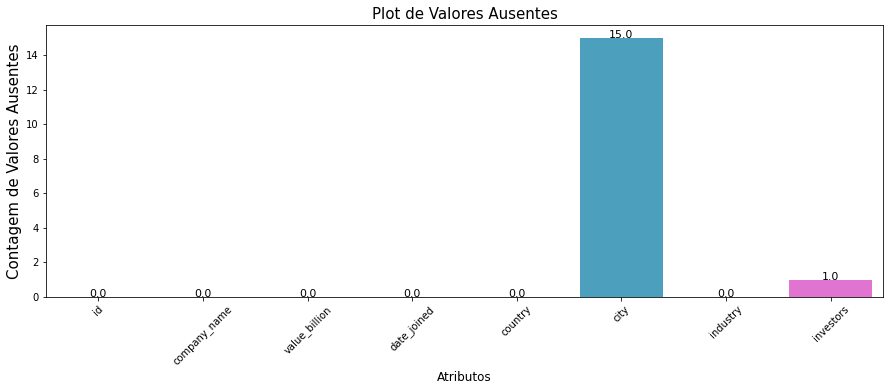

In [13]:
# figura
ax = plt.figure(figsize = (15,5))

# Barplot

ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12, )
plt.xticks(rotation=45)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 15)
plt.title('Plot de Valores Ausentes', fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + .4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

---
Temos 15 valores missing na variável ```city``` e 1 valor na variáve; ```investors```

In [14]:
#tratando os valores missing inputando "not informed"

base['city'] = base['city'].fillna('Not informed')
base['investors'] = base['investors'].fillna('Not informed')

In [15]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             936 non-null    object        
 1   company_name   936 non-null    object        
 2   value_billion  936 non-null    float64       
 3   date_joined    936 non-null    datetime64[ns]
 4   country        936 non-null    object        
 5   city           936 non-null    object        
 6   industry       936 non-null    object        
 7   investors      936 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 58.6+ KB


---
Agora temos 936 registros para todas as variáveis

In [16]:
#verificando valores duplicados
base['id'].duplicated().sum()

0

## Variável value_billion

In [17]:
base['value_billion'].describe()

count    936.000000
mean       3.281154
std        7.473179
min        1.000000
25%        1.050000
50%        1.600000
75%        3.000000
max      140.000000
Name: value_billion, dtype: float64

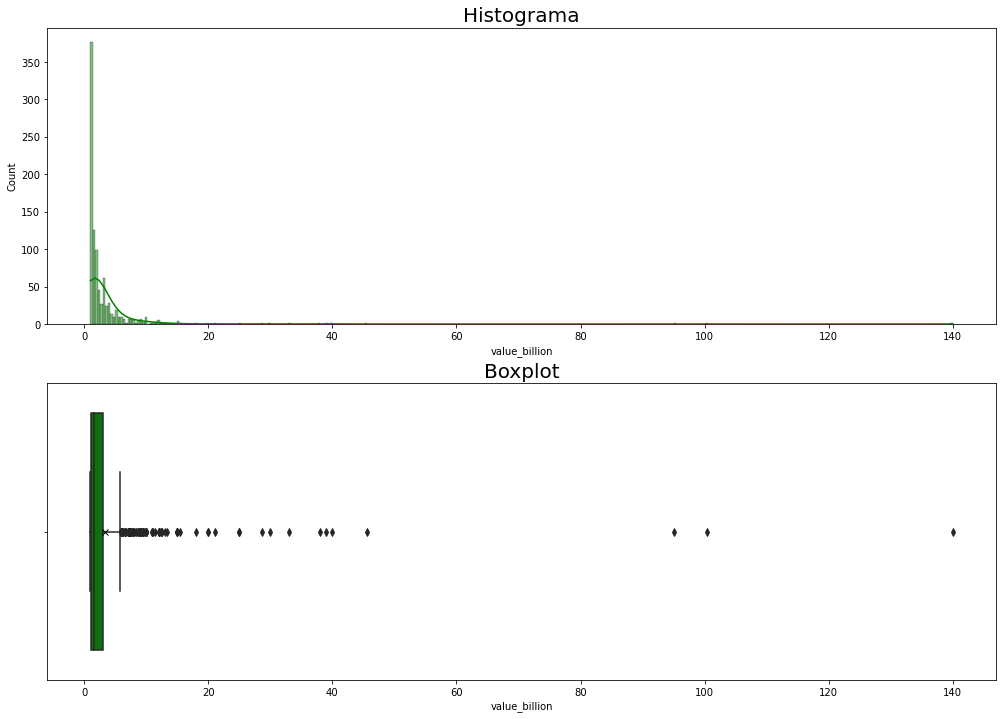

In [18]:
# Figura 
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(211)
sns.color_palette('hls', 8)
sns.histplot(base['value_billion'], kde = True, color = 'green')
plt.title('Histograma', fontsize = 20)

# Subplots com boxplots
plt.subplot(212)
sns.boxplot(base['value_billion'], color = 'green', showmeans=True, meanprops={'marker':'x', 'markeredgecolor':'black'})
plt.title('Boxplot', fontsize = 20)

plt.show()

## Variável Country

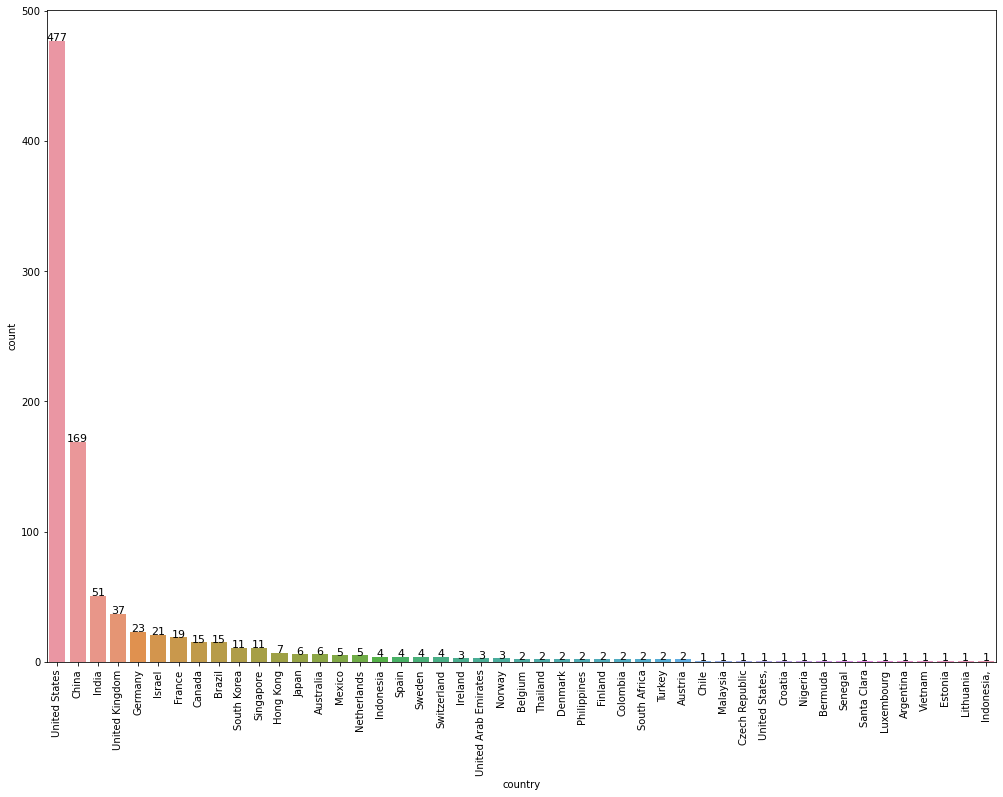

In [19]:
plt.figure(figsize = (17,12))
ax = sns.countplot(data = base, x = 'country', order = base['country'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + .4, (p.get_height())), ha = 'center', color = 'black', size = 11)
    
plt.xticks(rotation = 90)
plt.show()

## Variável industry

In [20]:
base['industry'] = base['industry'].str.replace('Finttech','Fintech')

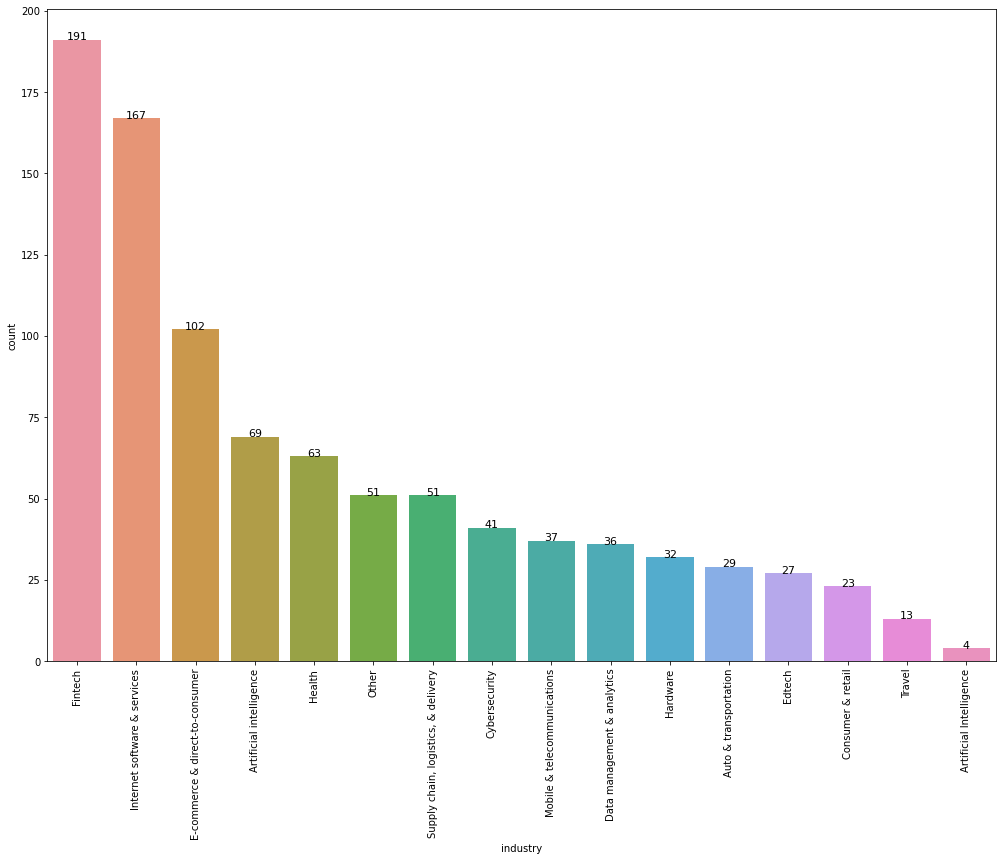

In [21]:
plt.figure(figsize = (17,12))
ax = sns.countplot(data = base, x = 'industry', order = base['industry'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + .4, (p.get_height())), ha = 'center', color = 'black', size = 11)
    
plt.xticks(rotation = 90)
plt.show()

# Questionários

In [60]:
base['year'] = pd.DatetimeIndex(base['date_joined']).year
base['month'] = base['date_joined'].dt.strftime('%b')
selection = base.groupby(['country', 'company_name', 'value_billion','year', 'month', 'date_joined']).count()['id'].reset_index()
selection.head()

,country,company_name,value_billion,year,month,date_joined,id
0,Argentina,Uala,2.45,2021,Aug,2021-08-13,1
1,Australia,Airwallex,5.50,2019,Mar,2019-03-25,1
2,Australia,Canva,40.00,2018,Jan,2018-01-08,1
3,Australia,Culture Amp,1.50,2021,Jul,2021-07-29,1
4,Australia,GO1,1.00,2021,Jul,2021-07-19,1


In [61]:
Brazil = selection[selection['country'] == 'Brazil'].sort_values(by = 'date_joined').reset_index(drop = True)
Brazil

,country,company_name,value_billion,year,month,date_joined,id
0,Brazil,Nubank,30.00,2018,Mar,2018-03-01,1
1,Brazil,Movile,1.00,2018,Jul,2018-07-12,1
2,Brazil,iFood,1.00,2018,Nov,2018-11-13,1
3,Brazil,Loggi,2.00,2019,Jun,2019-06-05,1
4,Brazil,QuintoAndar,5.10,2019,Sep,2019-09-09,1
5,Brazil,EBANX,1.00,2019,Oct,2019-10-16,1
6,Brazil,Wildlife Studios,3.00,2019,Dec,2019-12-05,1
7,Brazil,Loft,2.90,2020,Jan,2020-01-03,1
8,Brazil,C6 Bank,5.05,2020,Dec,2020-12-02,1
9,Brazil,Creditas,1.75,2020,Dec,2020-12-18,1


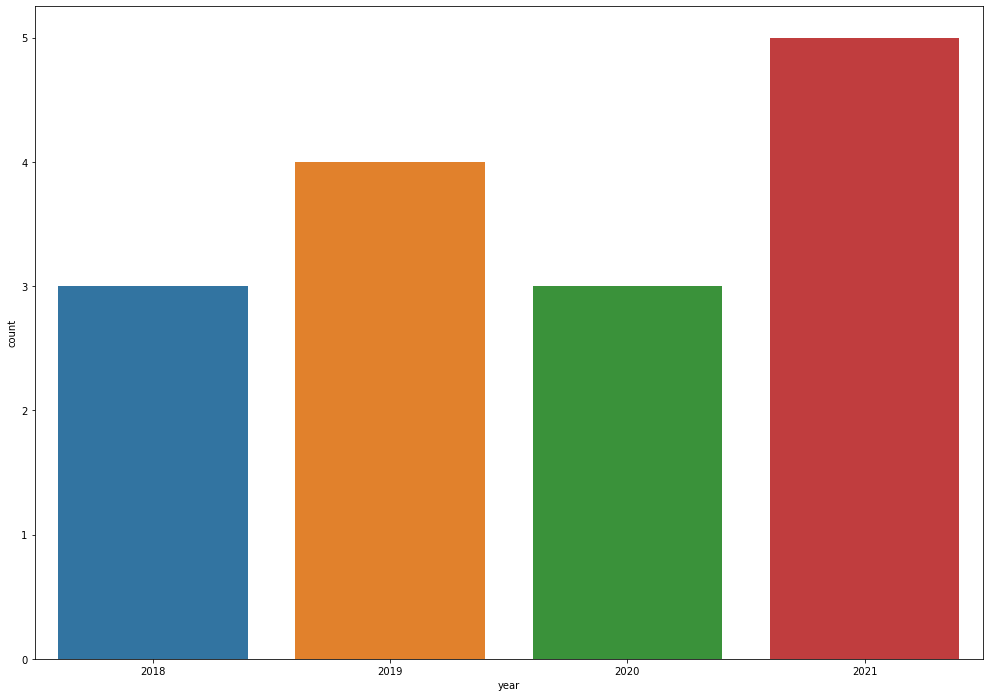

In [86]:
plt.figure(figsize = (17,12))
sns.countplot(data = Brazil, x = 'year')
plt.show()

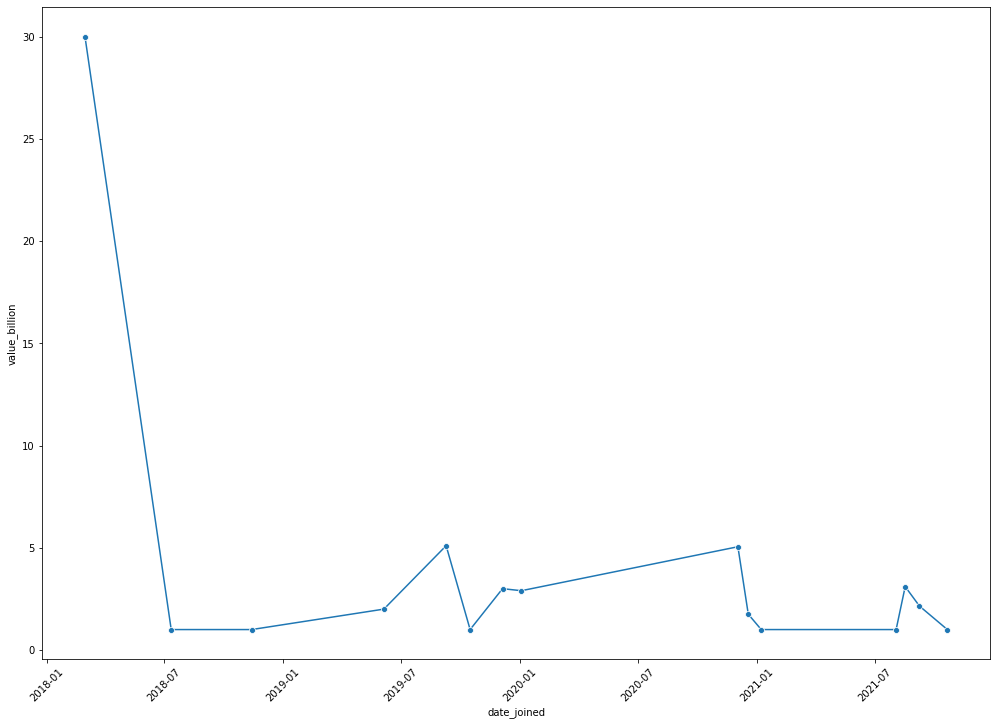

In [73]:
plt.figure(figsize = (17,12))
sns.lineplot(data = Brazil, x = 'date_joined', y = 'value_billion', marker= 'o')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + .4, (p.get_height())), ha = 'center', color = 'black', size = 11)
    
plt.xticks(rotation = 45)
plt.show()

In [74]:
base.head()

,id,company_name,value_billion,date_joined,country,city,industry,investors,year,month
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,Apr
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,Dec
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,Jan
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,Dec
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,Jan


In [100]:
base['country'] = base['country'].apply(lambda country: country.replace('United States,', 'United States'))
sum_values = base.groupby('country').sum()['value_billion'].reset_index().sort_values(by = 'value_billion', ascending = False)
sum_values.head(10).reset_index(drop=True)

,country,value_billion
0,United States,1605.03
1,China,569.48
2,United Kingdom,150.29
3,India,148.45
4,Germany,66.63
5,Brazil,61.05
6,Sweden,58.08
7,Australia,50.60
8,Israel,43.82
9,Hong Kong,41.45


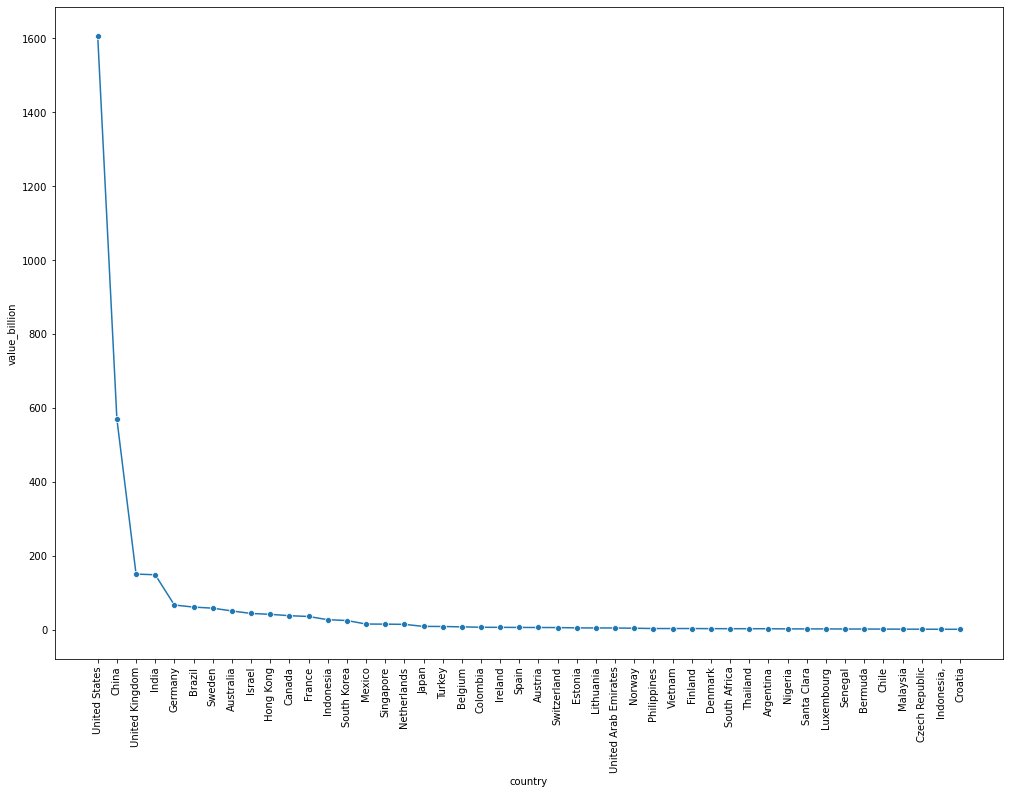

In [122]:
plt.figure(figsize = (17,12))
sns.lineplot(data = sum_values, x = 'country', y = 'value_billion', marker= 'o')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + .4, (p.get_height())), ha = 'center', color = 'black', size = 11)
    
plt.xticks(rotation = 90)
plt.show()

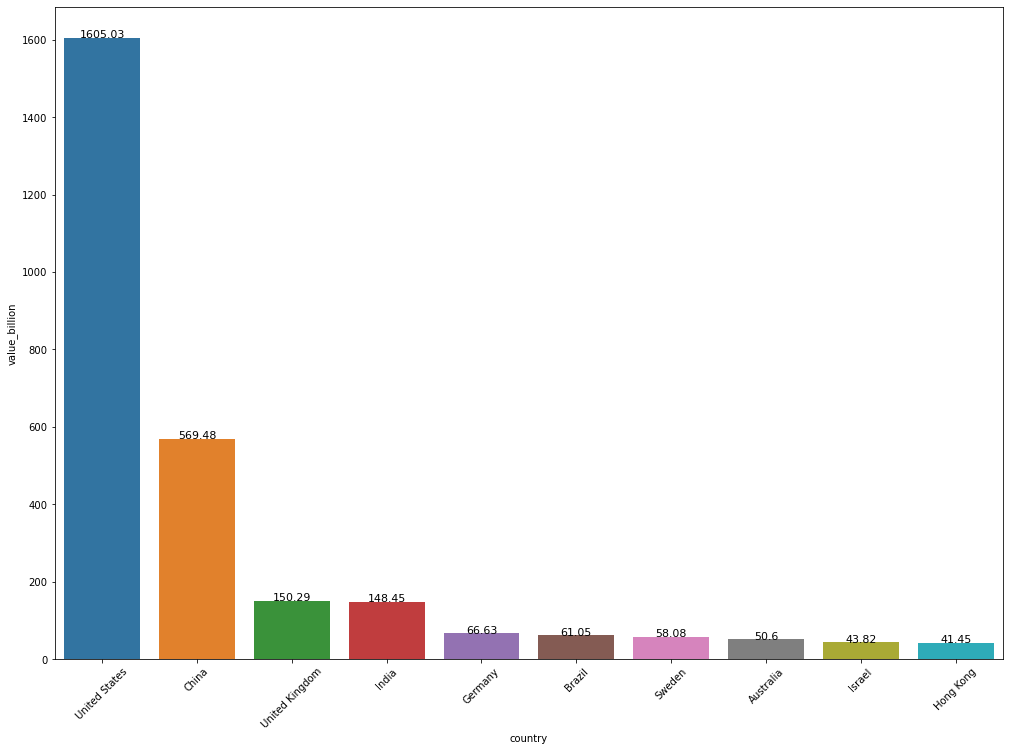

In [120]:

new_sum = sum_values.iloc[:10].reset_index(drop=True)
plt.figure(figsize = (17,12))

ax = sns.barplot(data = new_sum, x = 'country', y = 'value_billion', order = new_sum['country'].value_counts().index )

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + .4, (p.get_height())), ha = 'center', color = 'black', size = 11)
    
plt.xticks(rotation = 45)
plt.show()